In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random
import seaborn as sns
import math
import json

In [32]:
#Model Variables and Parameters
average_age=20
# Average ages in base year for underground and overhead distribution lines (in years)
age_shape=10
# We selected age shape and scale in a way that age_shape*age_scale=average_age
age_scale=2
# We selected age shape and scale in a way that age_shape*age_scale=average_age
length_shape=2
# We selected length shape and scale in a way that length_shape*length_age=average_length
length_scale=0.25
# We selected age shape and scale in a way that length_shape*age scale=average_length
average_length=0.5
# Average length for underground and overhead distribution lines (in miles)
segment_number= 625
# Numbers of line segments in the network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach segment's length is considered about 0.5 miles. So by dividing (91.5+121.7)/.5 we calculated this parameter.
baseyear=2021
#the year in which we are going to start conducting cost analysis
underground_baseyear=121
#Length of undergeound lines in miles in base year
overhead_baseyear=191
#Length of overhead lines in miles in base year
r=0.1
# Discount rate=10%
easment_value=3000
# per-acre price of a conservation easement
nfir=2100
# Non-fatality incidence rates, number of accidents per 100000 workers
fir=15
# Fatality incidence rates, number of accidents per 100000 workers
employees=8514/255
#The number of IOU employees
injurycost=130658
#A randomly determined annual injury cost, per accident
vsl=6900000
#The value of a statistical life
# changing overhead replcost to 83200
overhead_line={'lifespan':60,'replcost':83200,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':60}
underground_line={'lifespan':40,'replcost':357000,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':120,'over_under_raplcost':357000}
# the above two dictionaries shows related parameters for overhead and underground lines and the parameters are as follows:
#lifespan=Useful lifespan of overhead line and underground lines
#replcost=Cost associated with replacing a line with the same line type after it reaches its life span. 
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of line
# corridor_length= length of the corridor in feet needed for calculating environmental cost.
# over_under_raplcost= replacement cost associated with replacing an overhead line with an underground line.
###

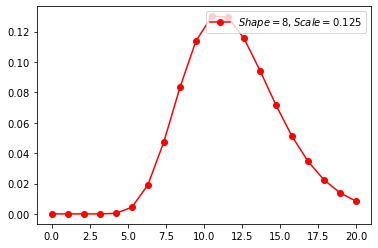

In [33]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, age_shape, age_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of line segment age

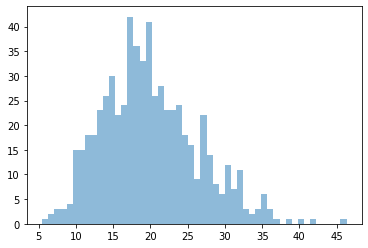

[14.73174888 15.21582847 15.80180449 18.89112725 22.44302224 15.32544849
 12.74721078 33.19065905 21.05920663 24.72038972 31.38301623 18.84451237
 20.35029596 26.48577742  9.14152725 18.08525521 14.03668047 14.92358188
 23.29591754 29.69280591 15.86719048 20.79453419 16.89612237 23.66129261
 22.7053155  23.10876679 21.54711839 24.2677729  20.72393081 19.01520798
  8.624739   30.82567152 14.1646452  29.95104939 21.59077983 16.56379243
 12.33509566 20.34840512 17.04820475 29.29579831 12.89883142 24.5404625
  8.35368288 24.05318478 23.91480862 21.39165691 25.35315085 11.57354563
 20.90564933 16.47694533 17.19396562 38.72753706 12.16679777 17.14228969
 15.72055392 16.88453058 13.86782715 19.93704454 20.09656091 16.6509131
 12.88109492  9.52731319 14.89930625 29.91193605  8.8414696  21.04225251
 19.10069395 24.0046084  30.30391242 25.46360764 10.72101259 31.91052915
 15.36025393 15.23349525 23.76799902 20.30520673 20.15782996 23.56725384
 15.92063411 17.38204392 11.04944017 19.40817909 17.3

In [34]:
age=np.random.gamma(age_shape,age_scale,segment_number)
plt.hist(np.random.gamma(age_shape,age_scale,segment_number),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined segment's ages in the base year

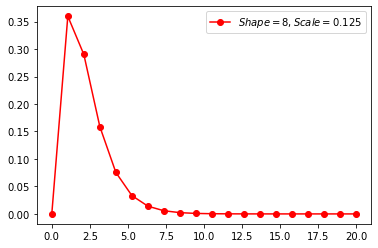

In [35]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, length_shape, length_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of line segments length
#length_shape*length_scale=average_length=0.5

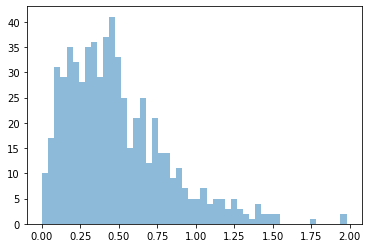

[0.85056893 0.31962725 0.17090919 0.59877315 0.61221171 0.09451287
 0.4906866  0.44644398 0.33863146 0.89706273 0.619279   0.46552861
 0.41351552 1.27813428 0.17558593 0.03721742 0.0715417  0.80975201
 1.97962718 0.14021202 0.17809113 0.41838893 0.41744066 0.27184274
 0.55840863 0.04762941 0.45453044 0.36202496 0.56849463 0.22402151
 1.33138881 0.35990023 0.60129685 0.81055086 0.32172964 0.90136396
 1.29923448 0.34719563 0.32742611 0.30656801 0.22944989 0.87931551
 0.52842175 0.79439989 0.10000509 0.55242103 1.18111382 0.88024254
 0.266118   0.38856027 0.45797054 0.16822037 0.19632154 0.3590247
 0.01378996 0.52105118 0.73519518 0.3357524  0.18459712 0.50158132
 1.08546516 0.88255711 1.27411083 1.44436324 0.13791354 0.81418965
 0.11327686 0.2667092  0.60466549 1.09640527 0.5605095  0.97975531
 0.96584926 1.03476427 0.40187252 0.34247469 0.6909651  0.2881953
 0.58921593 0.1870447  1.21244722 0.75047108 0.86380714 0.32171845
 0.46634567 0.36425284 0.91768833 0.64969509 0.36368542 0.483706

In [36]:
length=np.random.gamma(length_shape,length_scale,segment_number)
plt.hist(np.random.gamma(length_shape,length_scale,segment_number),alpha=0.5,bins=50)
plt.show()
print (length)
#Randomly determined circuit's ages in the base year

In [37]:
#Defining Line segment class with required attributes and methods and these methods are going to be modified based on requirements for each strategies in the simulations.
class Line_segment:
    ## The __init__ function as the constructor, which assigns random length, age and underground status for the base year to each line segment.
    def __init__(self, age_shape, age_scale, length_shape, length_scale, overhead_proportion):        
        self.age = [np.random.gamma(age_shape, age_scale)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(length_shape,length_scale) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        if self.underground[0]==1:
            self.replcost_rate=[underground_line['replcost']]
        else:
            self.replcost_rate=[overhead_line['replcost']]       
        self.capex=[0]
        self.opex=[self.calculate_opex()]
        self.environmental_restoration=[]
    ###Lifecycle Infrastructure Costs:
    # Add one year to the age of line segment,compare it to the lifespan, starts from 1 when reaches to lifespan and append this age to age list. Also append underground status to its list.
    def update_age_and_underground_statusQuo(self):
        if self.underground[-1]==1:
            lifespan_current= int(underground_line['lifespan'])
        else:
            lifespan_current= int(overhead_line['lifespan'])
        age_current=self.age[-1]
        if age_current<(lifespan_current-1):
            age_current+=1
            self.age.append(age_current)
            self.underground.append(self.underground[0])
        else:
            self.age.append(1)
            self.underground.append(self.underground[0])
            
    def update_age_and_underground_under_after_lifespan(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[-1])
        else:
            self.age.append(1)
            self.underground.append(1)
    
    #Add interest rate to the replacement cost and also cansider different replacementcost rate when underground=1        
    def add_replcost_intrest_rate(self):
        underground_current=self.underground[-1]
        underground_baseyear=self.underground[0]
        if underground_current==1:
            replcost_growth_rate_current=underground_line['replcost_growth_rate']
        else:
            replcost_growth_rate_current=overhead_line['replcost_growth_rate']
        if underground_current==underground_baseyear:        
            replcost_new=(self.replcost_rate[-1])+((replcost_growth_rate_current)*(self.replcost_rate[-1]))
            self.replcost_rate.append(replcost_new)
        else:
            replcost_new=underground_line['replcost']*((1+replcost_growth_rate_current)**(len(self.underground)-1))
            self.replcost_rate.append(replcost_new)
        return(self.replcost_rate)
    
    #Determine capital expenses which is replacement cost for each line segment based on the rate of replacement cost in that year and length of the circuit.
    def calculate_capex(self):
        if (self.age[-1])==1:
            length_current=self.length
            replcost_rate_current=self.replcost_rate[-1]
            replcost_new=(replcost_rate_current)*(length_current)
            self.capex.append(replcost_new)
        else:
            replcost_new=0
            self.capex.append(replcost_new)
        return(self.capex)
    
    #Determin operation and maintanace expenses which is a fraction of replacement rate for each circuit.
    def calculate_opex(self):
        underground_current=self.underground[-1]
        if underground_current==1:
            om_percentage_replcost_current=underground_line['om_percentage_replcost']
        else:
            om_percentage_replcost_current=overhead_line['om_percentage_replcost']
        length_current=self.length
        replcost_rate_current=self.replcost_rate[-1]
        opex=(om_percentage_replcost_current)*(length_current)*(replcost_rate_current)
        #opex_new=opex[-1]+om_growth_rate*opex[-1]
        #self.opex.append(opex)
        return(opex)
    
    #Add interest rate to opex.
    def add_opex_interest_rate(self):
        underground_current=self.underground[-1]
        if underground_current==1:
            om_growth_rate=underground_line['om_growth_rate']
        else:
            om_growth_rate=overhead_line['om_growth_rate']
        opex_new=self.opex[-1]+(self.opex[-1]*om_growth_rate)
        self.opex.append(opex_new)
        return(self.opex)

    #Determin the first retirement year
    def determine_first_retire(self):
        age_baseyear=self.age[0]
        underground=self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x=underground_line['lifespan']
        first_retire=(lifespan_x)-(age_baseyear)
        return (np.ceil (first_retire))
 
    ###Environmental Costs:
    #Determin environmental restoration cost based on the length of overhead and underground lines. (1mile= 5280 foot, 1sqmile=640 Acre) 
    def calculate_environmental_restoration(self):
        environmental_restoration_current=0
        if self.underground[-1]==1:
            if self.underground[0]==1:
                corridor_length=overhead_line['corridor_length']
                self.environmental_restoration.append(environmental_restoration_current)
            else:
                corridor_length=underground_line['corridor_length']-overhead_line['corridor_length']
                environmental_restoration_current=((self.length)*(corridor_length)*640/5280*easment_value)
                self.environmental_restoration.append(environmental_restoration_current)
        else:
            corridor_length=underground_line['corridor_length']
            self.environmental_restoration.append(environmental_restoration_current)
        return(self.environmental_restoration)

    
    ###Safety and health Costs:
    #Return fatal cost which is one element of safety cost
    def calculate_non_fatal_cost(self):
        return(nfir*employees/100000*injurycost)
    
    #Return non-fatal cost which is one element of safety cost
    def calculate_fatal_cost(self):
        return(fir*employees/100000*vsl)

In [38]:
#run simulation for calculating cost elemnts of statusQuo strategy and assign a data frame to them.
def run_cost_simulation_statusQuo_strategy(years_of_analysis):
    global df_line_segment_array
    global df_cost_line_segment_statusQuo
    global net_present_value_statusQuo
    line_segment_array=[]
    line_segment_length_array=[]
    line_segment_age_array=[]
    line_segment_underground_array=[]
    line_segment_capex_array=[0 for t in range (years_of_analysis)]
    line_segment_opex_array=[0 for t in range (years_of_analysis)]
    underground_length_new_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_length_total_array=[0 for t in range (years_of_analysis)]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_rate_array=[]
    for i in range (segment_number):
        segment=Line_segment(age_shape, age_scale, length_shape, length_scale, 0.66)
        line_segment_array.append(segment)
        line_segment_length_array.append(segment.length)
        line_segment_age_array.append(segment.age[0])
        line_segment_underground_array.append(segment.underground[0])
        line_segment_underground_length_total_array[0]+=line_segment_array[i].underground[0]
    np.random.seed(10101)
    random.seed(10102)
    df_line_segment_array=pd.DataFrame([line_segment_length_array, line_segment_age_array,line_segment_underground_array]).transpose()
    df_line_segment_array.columns=['length','base year age','base year underground']
    for t in range (years_of_analysis):
        for i in range (len(line_segment_array)):
            line_segment_array[i].update_age_and_underground_statusQuo()
            line_segment_array[i].add_replcost_intrest_rate()
            line_segment_array[i].calculate_capex()
            line_segment_array[i].calculate_opex()
            line_segment_array[i].add_opex_interest_rate()
            line_segment_array[i].calculate_environmental_restoration()
            line_segment_capex_array[t]+=line_segment_array[i].capex[t]
            line_segment_opex_array[t]+=line_segment_array[i].opex[t]
    line_segment_Lifecycle_infrastructure_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_Lifecycle_infrastructure_cost_array[t]=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_capex_array[t]+line_segment_opex_array[t]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_non_fatal_cost_array=[line_segment_array[0].calculate_non_fatal_cost() for t in range (years_of_analysis)]
    line_segment_fatal_cost_array=[line_segment_array[0].calculate_fatal_cost() for t in range (years_of_analysis)]
    line_segment_total_safety_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_safety_cost_array[t]=line_segment_non_fatal_cost_array[t]+line_segment_fatal_cost_array[t]

    line_segment_total_undergrounding_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_undergrounding_cost_array[t]+=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_environmental_restoration_cost_array[t]+line_segment_total_safety_cost_array[t]
    df_cost_line_segment_statusQuo=pd.DataFrame([range(years_of_analysis), line_segment_underground_length_total_array,line_segment_capex_array,line_segment_opex_array,line_segment_Lifecycle_infrastructure_cost_array,line_segment_environmental_restoration_cost_array,line_segment_non_fatal_cost_array,line_segment_fatal_cost_array,line_segment_total_safety_cost_array,line_segment_total_undergrounding_cost_array]).transpose()
    df_cost_line_segment_statusQuo.columns=['year','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
    df_cost_line_segment_statusQuo['year'] = df_cost_line_segment_statusQuo['year'].astype(int)
    net_present_value_lifecycle_infrastructure_cost=[]
    net_present_value_environmental_cost=[]
    net_present_value_safety_cost=[]
    net_present_value_total_statusQuo_strategy_cost=[]
    for index, row in df_cost_line_segment_statusQuo.iterrows():
        net_present_value_lifecycle_infrastructure_cost.append(row['Lifecycle infrastructure cost']/(1+r)**index)
        net_present_value_environmental_cost.append(row['environmental restoration cost']/(1+r)**index)
        net_present_value_safety_cost.append(row['total safety cost']/(1+r)**index)
        net_present_value_total_statusQuo_strategy_cost.append(row['total undergrounding cost']/(1+r)**index)
    total_infrastructre=sum(net_present_value_lifecycle_infrastructure_cost)
    total_environmental=sum(net_present_value_environmental_cost)
    total_safety=sum(net_present_value_safety_cost)
    total_total=sum(net_present_value_total_statusQuo_strategy_cost)
    net_present_value_statusQuo=pd.DataFrame([total_infrastructre,total_environmental,total_safety,total_total]).transpose()
    net_present_value_statusQuo.columns=['Net present value of lifecycle infrastructure cost','Net present value of environmental cost','Net present value of safety cost','Net present value of total statusQuo strategy cost']
    #print(df_line_segment_array)
    #print(net_present_value_statusQuo)
    #print(df_cost_line_segment_statusQuo)

In [39]:
run_cost_simulation_statusQuo_strategy(40)

In [40]:
df_line_segment_array

,length,base year age,base year underground
0,2.390412,25.105139,1.0
1,0.786987,11.702384,1.0
2,1.347191,29.567255,0.0
3,0.320442,15.289944,1.0
4,0.962417,19.910661,1.0
...,...,...,...
620,0.361465,19.791773,0.0
621,0.912230,22.895908,0.0
622,0.202527,21.662175,0.0
623,0.894645,23.991288,1.0


In [41]:
df_cost_line_segment_statusQuo

,year,total underground length,capex,opex,Lifecycle infrastructure cost,environmental restoration cost,non fatal cost,fatal cost,total safety cost,total undergrounding cost
0,0,213.0,0.000000e+00,2.761997e+05,2.761997e+05,0.0,91611.240988,34556.823529,126168.064518,4.023677e+05
1,1,0.0,6.061140e+05,2.900097e+05,8.961237e+05,0.0,91611.240988,34556.823529,126168.064518,1.022292e+06
2,2,0.0,0.000000e+00,3.045101e+05,3.045101e+05,0.0,91611.240988,34556.823529,126168.064518,4.306782e+05
3,3,0.0,6.825302e+05,3.197356e+05,1.002266e+06,0.0,91611.240988,34556.823529,126168.064518,1.128434e+06
4,4,0.0,1.753814e+05,3.357224e+05,5.111038e+05,0.0,91611.240988,34556.823529,126168.064518,6.372719e+05
5,5,0.0,0.000000e+00,3.525085e+05,3.525085e+05,0.0,91611.240988,34556.823529,126168.064518,4.786766e+05
6,6,0.0,1.281179e+05,3.701340e+05,4.982519e+05,0.0,91611.240988,34556.823529,126168.064518,6.244199e+05
7,7,0.0,2.033447e+05,3.886407e+05,5.919854e+05,0.0,91611.240988,34556.823529,126168.064518,7.181534e+05
8,8,0.0,1.636518e+05,4.080727e+05,5.717245e+05,0.0,91611.240988,34556.823529,126168.064518,6.978926e+05
9,9,0.0,7.092870e+05,4.284763e+05,1.137763e+06,0.0,91611.240988,34556.823529,126168.064518,1.263931e+06


In [42]:
net_present_value_statusQuo

,Net present value of lifecycle infrastructure cost,Net present value of environmental cost,Net present value of safety cost,Net present value of total statusQuo strategy cost
0,1.243677e+07,0.0,1.357184e+06,1.379395e+07


In [43]:
#run simulation for calculating cost elemnts of undergrounding after lifespan strategy and assign a data frame to them.
def run_cost_simulation_under_after_lifespan_strategy(years_of_analysis):
    global df_line_segment_array
    global df_cost_line_segment_under_after_lifespan
    global df_net_present_value_under_after_lifespan
    line_segment_array=[]
    line_segment_length_array=[]
    line_segment_age_array=[]
    line_segment_underground_array=[]
    environmental_restoration_cost=[]
    line_segment_capex_array=[0 for t in range (years_of_analysis)]
    line_segment_opex_array=[0 for t in range (years_of_analysis)]
    underground_length_new_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_length_total_array=[0 for t in range (years_of_analysis)]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_rate_array=[]
    for i in range (segment_number):
        segment=Line_segment(age_shape, age_scale, length_shape, length_scale, 0.66)
        line_segment_array.append(segment)
        line_segment_length_array.append(segment.length)
        line_segment_age_array.append(segment.age[0])
        line_segment_underground_array.append(segment.underground[0])
        line_segment_underground_length_total_array[0]+=line_segment_array[i].underground[0]
    np.random.seed(10101)
    random.seed(10102)
    df_line_segment_array=pd.DataFrame([line_segment_length_array, line_segment_age_array,line_segment_underground_array]).transpose()
    df_line_segment_array.columns=['length','base year age','base year underground']
    #underground_length_new=[]
    underground_total=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        for i in range (len(line_segment_array)):
            line_segment_array[i].update_age_and_underground_under_after_lifespan()
            line_segment_array[i].add_replcost_intrest_rate()
            line_segment_array[i].calculate_capex()
            line_segment_array[i].calculate_opex()
            line_segment_array[i].add_opex_interest_rate()
            line_segment_array[i].calculate_environmental_restoration()
            line_segment_capex_array[t]+=line_segment_array[i].capex[t]
            line_segment_opex_array[t]+=line_segment_array[i].opex[t]
            line_segment_environmental_restoration_cost_array[t]+=line_segment_array[i].environmental_restoration[t] 
            
    #Generating underground length new array
    underground_length_new=[0 for t in range (years_of_analysis)]
    for i in range (len(line_segment_array)):
        first_retire=line_segment_array[i].determine_first_retire()
        length=line_segment_array[i].length
        if int(first_retire)>years_of_analysis-1:
            pass
        else:
            if line_segment_array[i].underground[0]==0:
                underground_length_new[int(first_retire)]+=length
            if line_segment_array[i].underground[0]==1:
                underground_length_new[int(first_retire)]+=0
    zipped_lists = zip(line_segment_underground_length_total_array,underground_length_new)
    underground_length_total = [x + y for (x, y) in zipped_lists]
    new_underground_length_total=[]
    cumsum=0
    for ele in underground_length_total:
        cumsum+=ele
        new_underground_length_total.append(cumsum)
    underground_increase_rate=[1]
    for i in range (1,  len(new_underground_length_total)):
        devided= ((new_underground_length_total[i])/(new_underground_length_total[i-1]))
        underground_increase_rate.append(devided)
    line_segment_environmental_restoration_cost_array_multiply_new_under=[]
    for num1, num2 in zip(line_segment_environmental_restoration_cost_array, underground_length_new):
        line_segment_environmental_restoration_cost_array_multiply_new_under.append(num1 * num2)      
    line_segment_Lifecycle_infrastructure_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_Lifecycle_infrastructure_cost_array[t]=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_capex_array[t]+line_segment_opex_array[t]
    line_segment_non_fatal_cost_array=[line_segment_array[0].calculate_non_fatal_cost() for t in range (years_of_analysis)]
    line_segment_non_fatal_cost_array_under=[]
    for num1, num2 in zip(line_segment_non_fatal_cost_array, underground_increase_rate):
        line_segment_non_fatal_cost_array_under.append(num1 * num2)
    line_segment_fatal_cost_array=[line_segment_array[0].calculate_fatal_cost() for t in range (years_of_analysis)]
    line_segment_fatal_cost_array_under=[]
    for num1, num2 in zip(line_segment_fatal_cost_array, underground_increase_rate):
        line_segment_fatal_cost_array_under.append(num1 * num2)
    line_segment_total_safety_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_safety_cost_array[t]=line_segment_non_fatal_cost_array_under[t]+line_segment_fatal_cost_array_under[t]

    line_segment_total_undergrounding_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_undergrounding_cost_array[t]+=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_environmental_restoration_cost_array_multiply_new_under[t]+line_segment_total_safety_cost_array[t]
    df_cost_line_segment_under_after_lifespan=pd.DataFrame([range(years_of_analysis), new_underground_length_total,line_segment_capex_array,line_segment_opex_array,line_segment_Lifecycle_infrastructure_cost_array,line_segment_environmental_restoration_cost_array_multiply_new_under,line_segment_non_fatal_cost_array_under,line_segment_fatal_cost_array_under,line_segment_total_safety_cost_array,line_segment_total_undergrounding_cost_array]).transpose()
    df_cost_line_segment_under_after_lifespan.columns=['year','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
    df_cost_line_segment_under_after_lifespan['year'] = df_cost_line_segment_under_after_lifespan['year'].astype(int)
    net_present_value_lifecycle_infrastructure_cost=[]
    net_present_value_environmental_cost=[]
    net_present_value_safety_cost=[]
    net_present_value_total_under_after_lifespan_strategy_cost=[]
    for index, row in df_cost_line_segment_under_after_lifespan.iterrows():
        net_present_value_lifecycle_infrastructure_cost.append(row['Lifecycle infrastructure cost']/(1+r)**index)
        net_present_value_environmental_cost.append(row['environmental restoration cost']/(1+r)**index)
        net_present_value_safety_cost.append(row['total safety cost']/(1+r)**index)
        net_present_value_total_under_after_lifespan_strategy_cost.append(row['total undergrounding cost']/(1+r)**index)
    total_infrastructre=sum(net_present_value_lifecycle_infrastructure_cost)
    total_environmental=sum(net_present_value_environmental_cost)
    total_safety=sum(net_present_value_safety_cost)
    total_total=sum(net_present_value_total_under_after_lifespan_strategy_cost)
    df_net_present_value_under_after_lifespan=pd.DataFrame([total_infrastructre,total_environmental,total_safety,total_total]).transpose()
    df_net_present_value_under_after_lifespan.columns=['Net present value of lifecycle infrastructure cost','Net present value of environmental cost','Net present value of safety cost','Net present value of total statusQuo strategy cost']
    print (total_total)
    #print(df_line_segment_array)
    #print(df_cost_line_segment_under_after_lifespan)
    #print(df_net_present_value_under_after_lifespan)

In [44]:
run_cost_simulation_under_after_lifespan_strategy(40)

17674916.290520024


In [45]:
df_line_segment_array

,length,base year age,base year underground
0,0.225738,14.731749,1.0
1,0.393963,15.801804,1.0
2,0.230192,22.443022,0.0
3,1.338145,12.747211,1.0
4,0.730179,21.059207,1.0
...,...,...,...
620,0.094513,22.820023,0.0
621,0.446444,20.714079,0.0
622,0.897063,17.769020,0.0
623,0.465529,22.937441,1.0


In [46]:
df_cost_line_segment_under_after_lifespan

,year,total underground length,capex,opex,Lifecycle infrastructure cost,environmental restoration cost,non fatal cost,fatal cost,total safety cost,total undergrounding cost
0,0,213.000000,0.000000e+00,2.811541e+05,2.811541e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,4.073222e+05
1,1,213.000000,1.352234e+05,2.952118e+05,4.304352e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,5.566033e+05
2,2,213.000000,4.604595e+04,3.099724e+05,3.560184e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,4.821864e+05
3,3,213.000000,0.000000e+00,3.254710e+05,3.254710e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,4.516391e+05
4,4,213.000000,4.291119e+05,3.417446e+05,7.708565e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,8.970246e+05
5,5,213.000000,5.046064e+05,3.588318e+05,8.634382e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,9.896063e+05
6,6,213.000000,0.000000e+00,3.767734e+05,3.767734e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,5.029415e+05
7,7,213.000000,3.318446e+05,3.956121e+05,7.274567e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,8.536248e+05
8,8,213.000000,2.681199e+05,4.153927e+05,6.835126e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,8.096807e+05
9,9,213.000000,1.459029e+06,4.361623e+05,1.895191e+06,0.000000e+00,91611.240988,34556.823529,126168.064518,2.021359e+06


In [47]:
df_net_present_value_under_after_lifespan

,Net present value of lifecycle infrastructure cost,Net present value of environmental cost,Net present value of safety cost,Net present value of total statusQuo strategy cost
0,1.344057e+07,2.875238e+06,1.359112e+06,1.767492e+07
